In [69]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

mat_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/PROJECT/'+"student-mat.csv")

mat_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,Ssupport,Gsupport,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,mother,2,2,0,yes,no,no,no,no,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,father,1,2,0,no,yes,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,mother,1,2,3,yes,no,yes,no,yes,3,2,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,mother,1,3,0,no,yes,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,father,1,2,0,no,yes,yes,no,no,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,other,1,2,2,no,yes,yes,no,no,5,4,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,mother,2,1,0,no,no,no,no,yes,4,5,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,other,1,1,3,no,no,no,no,no,5,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,mother,3,1,0,no,no,no,no,yes,4,1,5,0,11,12,10


# Data Exploration

In [71]:
print('Total number of students: ',len(mat_data))

Total number of students:  395


In [72]:
print("Parameter are: ",mat_data.columns)

Parameter are:  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures',
       'Ssupport', 'Gsupport', 'feespaid', 'ecactivities', 'internet',
       'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [73]:
mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          395 non-null    object
 9   Fjob          395 non-null    object
 10  guardian      395 non-null    object
 11  traveltime    395 non-null    int64 
 12  studytime     395 non-null    int64 
 13  failures      395 non-null    int64 
 14  Ssupport      395 non-null    object
 15  Gsupport      395 non-null    object
 16  feespaid      395 non-null    object
 17  ecactivities  395 non-null    object
 18  internet      395 non-null    object
 19  freetime

In [74]:
mat_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [75]:
mat_data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

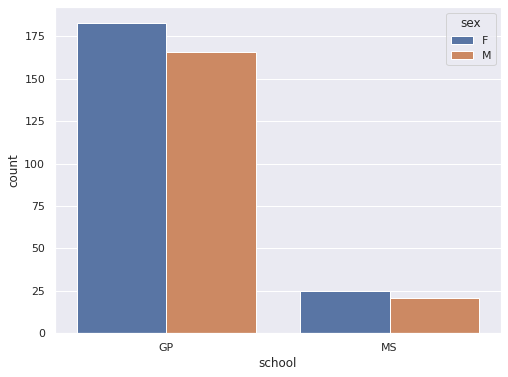

In [76]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="school", hue ="sex", data=mat_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


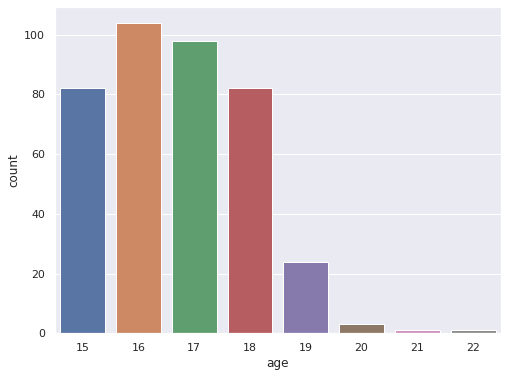

In [77]:
sns.countplot(mat_data.age)

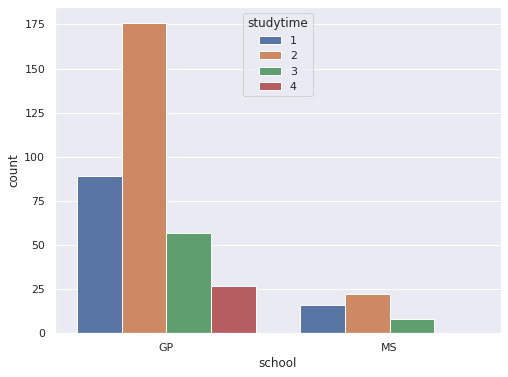

In [78]:
sns.countplot(x="school", hue ="studytime", data=mat_data)

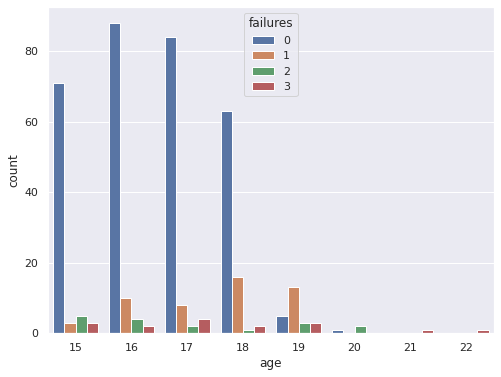

In [79]:
sns.countplot(x="age", hue="failures", data=mat_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


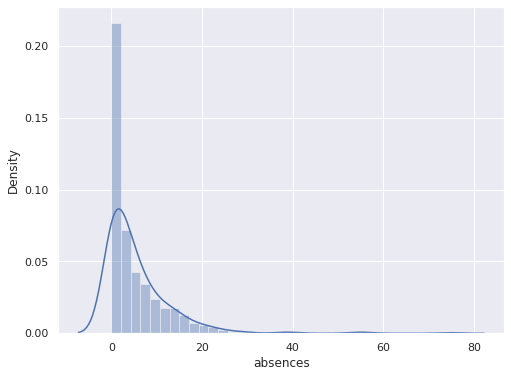

In [80]:
sns.distplot(mat_data.absences)

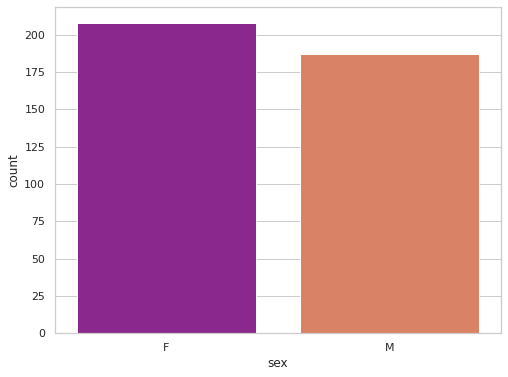

In [81]:
sns.set_style('whitegrid')    
sns.countplot(x='sex',data=mat_data,palette='plasma')

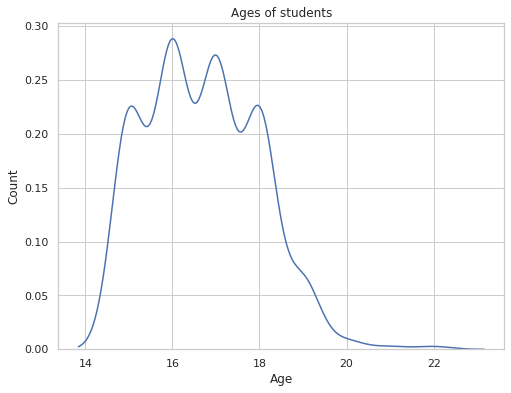

In [82]:
b = sns.kdeplot(mat_data['age']) 
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Previous Failures vs Final Grade(G3)')

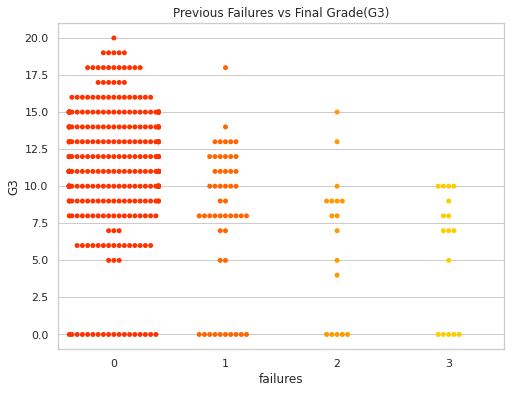

In [83]:
b = sns.swarmplot(x=mat_data['failures'],y=mat_data['G3'],palette='autumn')
b.axes.set_title('Previous Failures vs Final Grade(G3)')

# Finding Correlation between Attributes

In [84]:
mat_data['Total_Grades'] = mat_data['G1'] + mat_data['G2'] + mat_data['G3']

In [85]:
mat_data.corr()['Total_Grades'].sort_values(ascending=False)

Total_Grades    1.000000
G2              0.967999
G3              0.959873
G1              0.919386
Medu            0.224260
Fedu            0.175852
studytime       0.134565
freetime        0.003773
absences       -0.005909
health         -0.080380
traveltime     -0.128197
age            -0.134589
goout          -0.154511
failures       -0.375759
Name: Total_Grades, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


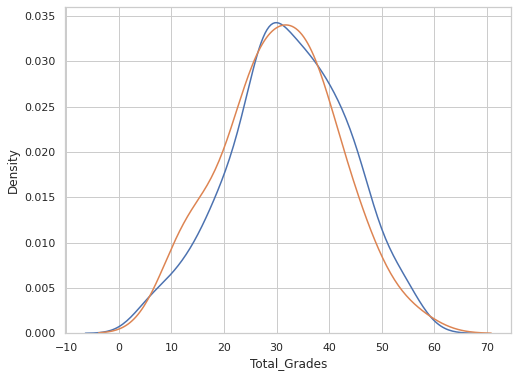

In [86]:
GP = mat_data[mat_data.school == 'GP']
MS = mat_data[mat_data.school == 'MS']

sns.distplot(GP.Total_Grades, hist=False, label="GP")
sns.distplot(MS.Total_Grades, hist=False, label="MS")
plt.show()

In [87]:
mat_data = mat_data.drop(['school', 'G1', 'G2', 'Total_Grades'], axis=1)

In [88]:
most_correlated = mat_data.corr().abs()['G3'].sort_values(ascending=False)
most_correlated

G3            1.000000
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

In [89]:
mat_data = mat_data.loc[:, most_correlated.index]
mat_data.head()

,G3,failures,Medu,age,Fedu,goout,traveltime,studytime,health,absences,freetime
0,6,0,4,18,4,4,2,2,3,6,3
1,6,0,1,17,1,3,1,2,3,4,3
2,10,3,1,15,1,2,1,2,3,10,3
3,15,0,4,15,2,2,1,3,5,2,2
4,10,0,3,16,3,2,1,2,5,4,3


# Grade Prediction

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mat_data, mat_data['G3'], test_size = 0.25, random_state=42)

In [91]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Predicted Grade: ",predictions,sep = '\n')

Predicted Grade: 
[1.00000000e+01 1.20000000e+01 5.00000000e+00 1.00000000e+01
 9.00000000e+00 1.30000000e+01 1.80000000e+01 6.00000000e+00
 1.47366263e-14 1.40000000e+01 1.50000000e+01 7.00000000e+00
 1.50000000e+01 1.00000000e+01 1.40000000e+01 8.00000000e+00
 8.00000000e+00 1.10000000e+01 1.50000000e+01 1.47663870e-14
 1.40000000e+01 1.60000000e+01 1.60000000e+01 6.00000000e+00
 1.51270867e-14 1.90000000e+01 1.10000000e+01 1.20000000e+01
 1.70000000e+01 1.00000000e+01 8.00000000e+00 1.00000000e+01
 1.50000000e+01 1.30000000e+01 8.00000000e+00 5.00000000e+00
 1.50212506e-14 1.50000000e+01 1.40000000e+01 8.00000000e+00
 5.00000000e+00 1.10000000e+01 1.40000000e+01 9.00000000e+00
 1.50000000e+01 1.00000000e+01 1.10000000e+01 1.30000000e+01
 1.30000000e+01 1.60000000e+01 1.30000000e+01 1.50000000e+01
 1.20000000e+01 1.00000000e+01 6.00000000e+00 1.20000000e+01
 1.10000000e+01 1.51124694e-14 1.60000000e+01 1.70000000e+01
 1.40000000e+01 1.00000000e+01 1.00000000e+01 6.00000000e+00
 9.000

In [92]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

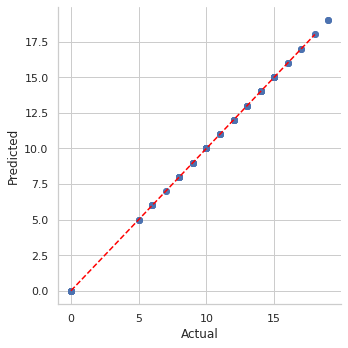

In [93]:
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()